<center><h1> <font color="blue"> Gradient </font></h1></center>
<h2><div align="right"> <font color ="tomato"> Prepared by: Dr.S.Rajalakshmi </font> </h2>

<h2> <font color = "blue"> 1. Roberts Filter </font> </h2>

<h4> <font color = "red"> 1. Load Necessary Libraries </font></h4>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h4> <font color = "red"> 2. Read the image in Grey Scale Mode </font></h4>

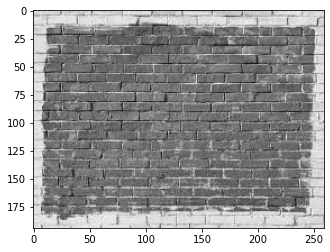

In [2]:
# Load the image and convert to grayscale
image = cv2.imread('bricks.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')


<h4> <font color = "red"> 3. Initialize the kernel </font></h4>

In [3]:
# Define the Roberts Cross kernels
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)


<h4> <font color = "red"> 4. Apply the kernel </font></h4>


In [4]:
# Apply the kernels using filter2D
grad_x = cv2.filter2D(image, -1, kernel_x) #-1 represents output image will be of same data type as of input image
grad_y = cv2.filter2D(image, -1, kernel_y)

<h4> <font color = "red"> 5. Compute the magnitude </font></h4>


In [5]:
# Compute the  magnitude: sqrt(grad_x^2 + grad_y^2)
magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))

# Normalize the result to the range [0, 255] for display purposes
magnitude = np.uint8((magnitude / magnitude.max()) * 255)


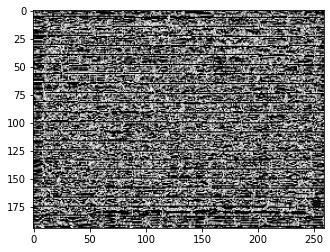

In [6]:
# Display the result
#plt.imshow(image)
plt.imshow(magnitude,cmap='gray')


<h2> <font color = "blue"> 2. Sobel Edge Detection Algorithm </font> </h2>

<h4> <font color = "red"> 1. Load Necessary Libraries </font></h4>

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


<h4> <font color = "red"> 2. Read the image in Grey Scale Mode </font></h4>

In [8]:
#  Read the image
image = cv2.imread('bricks.jpeg')

#  Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


<h4> <font color = "red"> 3. Apply the sobel filter in horizontal and vertical directions</font></h4>

<p> <font color="magenta">
   <ul>
       <li>gray_image: The input image, which must be a single-channel grayscale image.</li>
    <li> cv2.CV_64F: The data type of the output image (in this case, 64-bit floating point). To preserve negative gradient value </li>
       <li>1,0 : Horizontal kernel
           0,1 : Vertical kernel </li>
       <li> kernel size: controls the size of the neighborhood  </li>
   </ul>
    </font></p>

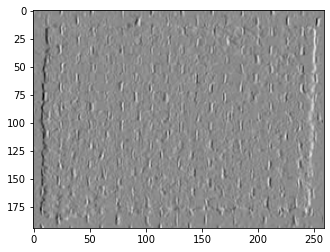

In [9]:
# Apply Sobel filter
# Sobel X - detects edges in the x direction;
#Horizontal kernel detects vertical edges 
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
plt.imshow(sobel_x,cmap='gray')

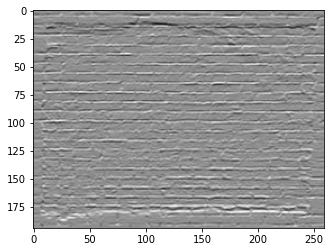

In [10]:
# Sobel Y - detects edges in the y direction
#Vertical Kernel detects Horizontal Edges
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
plt.imshow(sobel_y,cmap='gray')

<h4> <font color = "red"> 4. Calculate the Gradient Magnitude </font></h4>

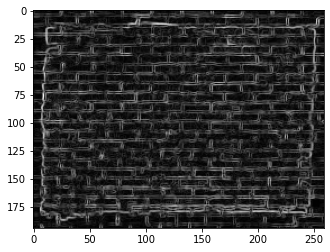

In [11]:
#  Calculate the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the magnitude image to range 0-255 for display
sobel_magnitude = np.uint8(sobel_magnitude / sobel_magnitude.max() * 255)

plt.imshow(sobel_magnitude,cmap='gray')

<h4> <font color = "red"> 5. Display the edges </font></h4>

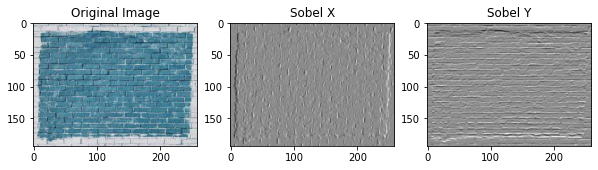

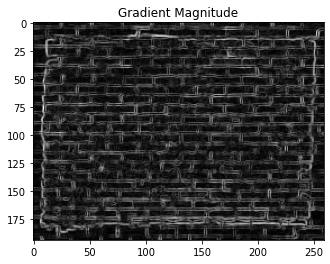

In [12]:
# Display the results
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap='gray')

plt.figure()
plt.title("Gradient Magnitude")
plt.imshow(sobel_magnitude, cmap='gray')

plt.show()


<h2> <font color = "blue"> 3. Implementation of Prewitt Edge Detection </font> </h2>

<h4> <font color = "red"> 1. Load Necessary Libraries </font></h4>

In [13]:
#cv2 does not have built in prewitt operator
import numpy as np
from scipy import ndimage # contains built in prewitt operator scipy - scientific python
import cv2
import matplotlib.pyplot as plt


<h4> <font color = "red"> 2. Read the image in Grey Scale Mode </font></h4>

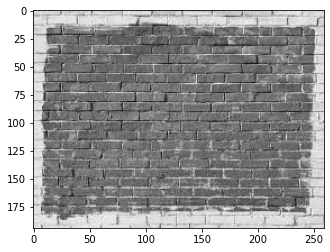

In [14]:
image = cv2.imread("bricks.jpeg",0)

#image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

#image_ = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image,cmap='gray')


<h4> <font color = "red"> 3. Apply the Prewitt filter in horizontal and vertical directions</font></h4>

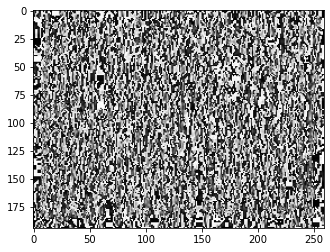

In [15]:
Gx = ndimage.prewitt(image, axis=1)  # Horizontal gradient
plt.imshow(Gx,cmap='gray')

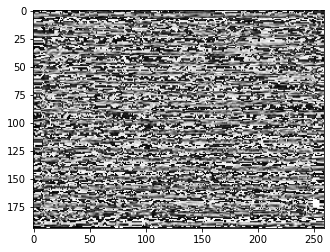

In [16]:
Gy = ndimage.prewitt(image, axis=0)  # Vertical gradient
plt.imshow(Gy,cmap='gray')

<h4> <font color = "red"> 4. Calculate the Gradient Magnitude </font></h4>

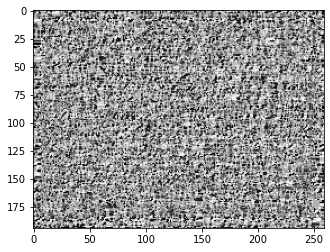

In [17]:
# Calculate the gradient magnitude
magnitude = np.hypot(Gx, Gy)  # Equivalent to sqrt(Gx^2 + Gy^2)
# Normalize the magnitude to range 0 to 255 for display
magnitude = (magnitude / magnitude.max()) * 255
magnitude = magnitude.astype(np.uint8)  # Convert to unsigned 8-bit integer type
plt.imshow(magnitude,cmap='gray')

<h4> <font color = "red"> 5. Display the edges </font></h4>

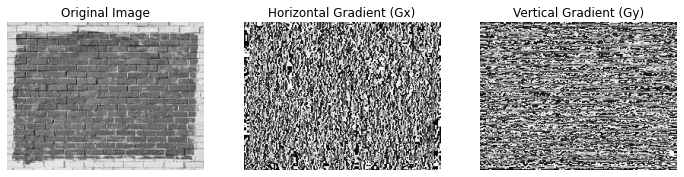

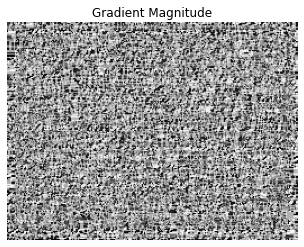

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Horizontal Gradient (Gx)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Vertical Gradient (Gy)')
plt.axis('off')

plt.figure()
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()